## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [7]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [8]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [9]:
#to find the proportion of users converted, we take the number of users converted
#and divide by the total number of users
proportion = df.query('converted == 1').shape[0]/df.shape[0]
proportion

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

<font color='blue'>__To calculate this, two separate quantities need to be determined__
1. We need to determine the number of times users from the treatment group did not land on the new_page and
2. The number of times users that landed on the new_page were not new users<font>

In [10]:
#Here we make a database of only the treatment group
treat = df.query('group == "treatment"')

#Since we are not asked for unique users, but just the instances, we calculate the total instances this happened 
mismatch = treat.shape[0] - treat.query('landing_page == "new_page"').shape[0]


In [11]:
#Now make a database of only the new_page 
newp = df.query('landing_page == "new_page"')

#Calculate the number of instances that landed on the new_page but weren't treatment group
mismatch2 = newp.shape[0] - newp.query('group == "treatment"').shape[0]


In [12]:
#Calculate the total number of such instances 
print(mismatch+mismatch2)

3893


<font color='blue'>__The total number of times that the new_page and treatment don't match is 3893.__<font>

f. Do any of the rows have missing values?

In [13]:
#We can use the .info() function to check for any null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<font color='blue'>Based on the information above, there are no rows with missing values<font>

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [32]:
#Drop the rows with the mismatched data
df1 = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')].index)
df2 = df1.drop(df1[(df1['group'] == 'control') & (df1['landing_page'] == 'new_page')].index)

#Check the shape of the new database
df2.shape

(290585, 5)

In [33]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [34]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [35]:
duplicated_id = df2['user_id'].duplicated()
df2[duplicated_id].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [36]:
df2[duplicated_id]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [37]:
#Drop the duplicated user based on the indeX
df2.drop([2893], inplace = True)

#Check the shape of the database to ensure that the user has been dropped
df2.shape

(290584, 5)

In [38]:
#Check the df2 database
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [39]:
#For this, we need the number converted and the total number
convert = df2.query('converted == 1')
fraction = convert.shape[0]/df2.shape[0]
fraction

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [40]:
#For this we need the number of converted users in the control group
cntr = df2.query('group == "control"')
frac_cntr = cntr.query('converted == 1').shape[0]/cntr.shape[0]
frac_cntr

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [41]:
#For this we need the number of converted users in the treatment group
treat = df2.query('group == "treatment"')
frac_treat = treat.query('converted == 1').shape[0]/treat.shape[0]
frac_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [42]:
new_page = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]
new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<font color='blue'> __In the exercise above, we calculate the probability of an individual converting given the following scenarios__
    
 1. Probability of an individual converting regardless of the page they receive
 2. Probability of an individual converting in the control group
 3. Probability of an individual converting in the treatment group 
    
In all the three cases, the probability of conversion is __~12%__, and based on this information, we can say that we do not have evidence that the new treatment page leads to more conversions. 

Moreover, we also calculate the probability of a user landing on the treatment page, and it's ~50%, therefore suggesting that there is no bias based on the number of users. 
<font>



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<font color='blue'>

__The null hypothesis__ is that the probability of the conversion rates for the old and the new pages are equal

**$H_{null}$**:  **$p_{old}$** = **$p_{new}$**

__The alternative hypothesis__ is that the probability of conversion for the new page is greater than the probability of conversion for the old page. 

**$H_{alt}$**:  **$p_{old}$** < **$p_{new}$**


<font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [43]:
convert = df2.query('converted == 1')
p_new = convert.shape[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [44]:
#this is the same as the above, because both rates are the same under the null 
convert2 = df2.query('converted == 1')
p_old = convert2.shape[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [45]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [46]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [47]:
new_page_converted = np.random.choice(2,n_new, p=[p_new,1-p_new])
new_page_converted.mean()

0.88069644208932629

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
old_page_converted = np.random.choice(2,n_old, p=[p_old,1-p_old])
old_page_converted.mean()

0.87955174360174571

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
new_page_converted.mean() - old_page_converted.mean()

0.0011446984875805866

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [50]:
p_diffs = []
size = 10000
for _ in range(10000):
    new_page_converted = np.random.choice(2,n_new, p=[p_new,1-p_new]).mean()
    old_page_converted = np.random.choice(2,n_old, p=[p_old,1-p_old]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<font color='blue'> The histogram is plotting the difference between the fraction converted from the treatment page, and the fraction converted from the control page. As we saw from the simulation from __e to g__, this value is very close to zero. 
    
In __h__ we simulate this 10,000 times, and the histogram gives the distribution centered around zero, which was expected due to the results from the original simulation. 

Moreover, this is also in agreement with the results from __Part 1__, where we saw a very little difference between the treatment and control groups.
<font>

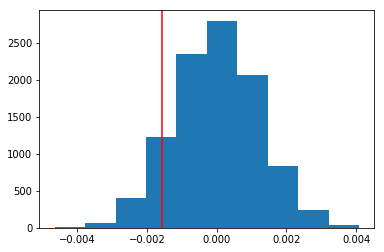

In [52]:
p_diffs = np.array(p_diffs)
obs_diff = frac_treat - frac_cntr
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
(p_diffs > obs_diff).mean()

0.90390000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

<font color='blue'>The aim of this exercise is to determine if the new page is better than the old page at converting user. 
The above histogram shows the null hypothesis, where the rate of conversion from the old page is the same as the rate of conversion from the new page. 

**$H_{null}$**:  **$p_{old}$** = **$p_{new}$**

To prove the alternate hypothesis we need to show that the conversion rate from new is greater than the conversion rate from the old, with a p value of 0.05 

**$H_{alt}$**:  **$p_{old}$** < **$p_{new}$**. 

However, based on this analysis and the value computed in part __j__, we see a p value of 0.90, and therefore we cannon disprove the null hypothesis.</font>




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [54]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').converted.size
n_new = df2.query('group == "treatment"').converted.size

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [55]:
z_score,p_val = sm.stats.proportions_ztest(np.array([convert_new,convert_old]), np.array([n_new,n_old]),  alternative='larger')

print('z-score is '+ str(z_score))
print('p-value is ' + str(p_val))


z-score is -1.31092419842
p-value is 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<font color='blue'>For a one tailed test, a z value of 1.96 is significant, but here we have a z-score of -1.31. Moreover, like in parts j and k, the p-value is 0.9, which is not significant compared to a threshold of 0.05. Therefore, based on both these tests, we cannot reject the null hypothesis. <font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** 

<font color='blue'>Since each row is either conversion or no conversion, we will use logistic regression in this case.<font> 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
df2['intercept'] = 1

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [58]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:55:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


**Put your answer here.**

<font color='blue'>
    
__The p-value calculated using the regression model is 0.190. This is very different from the p-value of 0.90 calculated in section 2.__

In section 2, our null hypothesis was that there is no difference between the probability of a user converting from the control or treatment group, and the alternative hypothesis was that the probability of a user converting from the treatment group was higher than the control grou. 

In the regression model, our null hypothesis is that there is no correlation between the user converting and the group. The alternative hypothesis is that there is a positive correlation between the user conversion and the treatment group. 

In section 2, we are looking at the difference in the probabilities of conversion between the two groups by random sampling, whereas in section 3, we are looking at direct correlation, and this may lead to the diffences observed. 

However, in both the cases, the alpha p-value is 0.05 to disprove the null hypothesis, and in both cases, our p-value is much greater, therefore we cannot disprove the null hypothesis.<font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

<font color='blue'>
    
__The p-value calculated using the regression model is 0.190. This is very different from the p-value of 0.90 calculated in section 2.__

In section 2, our null hypothesis was that there is no difference between the probability of a user converting from the control or treatment group, and the alternative hypothesis was that the probability of a user converting from the treatment group was higher than the control grou. 

In the regression model, our null hypothesis is that there is no correlation between the user converting and the group. The alternative hypothesis is that there is a positive correlation between the user conversion and the treatment group. 

In section 2, we are looking at the difference in the probabilities of conversion between the two groups by random sampling, whereas in section 3, we are looking at direct correlation, and this may lead to the diffences observed. 

However, in both the cases, the alpha p-value is 0.05 to disprove the null hypothesis, and in both cases, our p-value is much greater, therefore we cannot disprove the null hypothesis.<font>
When performing A/B testing, the main objective is to analyze if there are certain factors that influence the user behavior. If the current regression model cannot predict these factors, then we add other factors to the regression model. However, we should be prudent when adding additional factors and ensure that there is some practical relationship between these factors and the user behavior. If we can use regression to understand which factors to consider for user behavior, this becomes a very powerful strategic tool for business. Therefore an honest attempt must be made to uncover any additional factors. 

However, one maybe careful when adding additional terms to regression. 
1. The terms must be chosen carefully. For example, we are analyzing a customer behavior on two different web-pages for an email client. In this case, adding a factor of pet ownership may not be the best idea. 

2. Sometimes adding too many parameters can be time consuming and may return unclear results. <font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [60]:
#Read in the country file and check if it read in properly
df_c = pd.read_csv('countries.csv')
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [61]:
#Merge the two databases into a new database, and check if the merge happened correctly
df_final = pd.merge(df2,df_c,on='user_id')
df_final.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [62]:
#Ensure that there are no null objects
df_final.info()

#Find out the unique values in the country column
df_final.country.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


array(['US', 'CA', 'UK'], dtype=object)

In [65]:
#Get dummy variables for the three countries and append to the database
df_final[['US','CA','UK']] = pd.get_dummies(df_final['country'])

#Check for the new columns
df_final.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [66]:
#Fit a logistic regression model 
log_mod = sm.Logit(df_final['converted'], df_final[['intercept','ab_page', 'US', 'CA']])
results_2 = log_mod.fit()
#Check the results
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        22:56:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
CA             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [67]:
#Should the relationship of the coefficients for the different countries 
#US vs UK and CA vs UK
np.exp(-0.0408),np.exp(0.0099)

(0.96002111497165088, 1.0099491671175422)

<font color='blue'>

### Summary

In this section, we use a logistic regression model to check if the user conversion is affected by the landing page and the country. 

We have users in three countries USA, UK and Canada (CA). For this analysis, we use UK as the base country, i.e. the regression results for US and CA are compared to UK. 

For this analysis, we take the following steps
1. Import the countries database
2. Merge the two databases, and check if they have merged
3. Create dummy variables for the countries
4. Perform a logistic regression. 

__Observations__

1. As in the previous case, we see that the ab_page does not have a statistically significant effect on the conversion (z = -1.3, p = 0.19). 
2. To analyze how the countries may affect the conversion rate, we exponentiate the coefficients for US and CA to find comparision vs. UK. Based on the coeffiencients, we find 
    1. Users in US are 4% less likely to convert compared to users in UK
    2. Users in CA are 1% more likely to convert compared to users in UK
    3. In each case, the p-value is very high (US = 0.13; CA = 0.46) indicating that these changes are not statisitcally significant.
    <font>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
#Add new interaction terms into the column by multiplying the ab_page with the countries
df_final['US_page'] = df_final['US']*df_final['ab_page']
df_final['CA_page'] = df_final['CA']*df_final['ab_page']
df_final['UK_page'] = df_final['UK']*df_final['ab_page']
df_final.head(10)



,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,CA,UK,US_page,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0,0


In [62]:
log_mod = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page','US','US_page','CA','CA_page']])
results_log = log_mod.fit()
results_log.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        21:34:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
CA            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<font color='blue'>

### Summary

After adding the interaction columns with the ab_page and the countries, logistic regression was performed. However, even in this case, no correlation was clear. Moreover, due to the interaction between the variables, it became more difficult to analyze how a particular variable affect the coversion itself. Therefore, it is probably best to not use interaction between the page and the country for this regression analysis. 

<font>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

https://github.com/Volodymyrk/stats-testing-in-python/blob/master/03%20-%20AB%20testing%20Proportions%20with%20z-test.ipynb